**To do**
* Plot sales as a time-series : check if there are any patterns (Done)
* Plot correlation matrix of features (Done)
* Add linear regressions
* Find a way to include lag effect in the analysis
  * Include lag variables (DONE)
* Add features to the model
  * Log features
  * Power features
  * Interaction features
* Add K-fold cross validation to the model
* For the slides :    
  * Plot the effect of Insta, Tik Tok, SEA, Colabs
  * Plot sales and predictions
  * Recap the method we used for the analysis
  * Recap the results of the analysis
* Save the prediction in a CSV file for the other to use in the dashboard

In [ ]:
install.packages("caret")
install.packages("MASS")

library(caret)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



In [ ]:
set.seed(64)
load("/content/MindSet Data.RData")

# EDA

In [ ]:
df_variances <- sapply(MindSetDF, var)
print(df_variances)

           Sales        Awareness           Liking    Consideration 
    1.272220e+07     3.725788e-02     4.380303e+01     4.282778e+01 
    InstagramAds        TikTokAds              SEA    PoSPromotions 
    1.632553e+05     7.873696e+04     8.616557e+05     7.622269e+03 
InfluencerColabs 
    2.345750e+04 


In [ ]:
head(MindSetDF)
summary(MindSetDF)
str(MindSetDF)

,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827


     Sales         Awareness         Liking        Consideration     
 Min.   :56117   Min.   :20.84   Min.   :-19.722   Min.   :-16.5002  
 1st Qu.:65277   1st Qu.:21.85   1st Qu.: -3.096   1st Qu.: -0.2323  
 Median :67522   Median :21.97   Median :  1.641   Median :  4.2962  
 Mean   :67506   Mean   :21.96   Mean   :  1.259   Mean   :  4.0564  
 3rd Qu.:70098   3rd Qu.:22.09   3rd Qu.:  5.653   3rd Qu.:  8.3641  
 Max.   :78658   Max.   :22.46   Max.   : 22.831   Max.   : 25.6496  
  InstagramAds      TikTokAds           SEA         PoSPromotions  
 Min.   :   1.0   Min.   :   4.0   Min.   :   0.0   Min.   :  2.0  
 1st Qu.: 318.8   1st Qu.: 223.0   1st Qu.: 678.8   1st Qu.:103.8  
 Median : 638.5   Median : 450.0   Median :1324.5   Median :163.0  
 Mean   : 663.0   Mean   : 465.7   Mean   :1428.2   Mean   :168.7  
 3rd Qu.: 984.8   3rd Qu.: 691.0   3rd Qu.:2024.8   3rd Qu.:227.0  
 Max.   :1499.0   Max.   :1000.0   Max.   :4491.0   Max.   :479.0  
 InfluencerColabs
 Min.   : 379.0 

'data.frame':	1100 obs. of  9 variables:
 $ Sales           : Time-Series  from 1 to 1100: 67339 66783 62019 72356 63810 ...
 $ Awareness       : Time-Series  from 1 to 1100: 21.5 21.9 21.7 22 21.9 ...
 $ Liking          : Time-Series  from 1 to 1100: 5.41 4.75 -8.36 10.49 -4.53 ...
 $ Consideration   : Time-Series  from 1 to 1100: 6.76 6.89 -5.69 12.68 -1.27 ...
 $ InstagramAds    : Time-Series  from 1 to 1100: 301 1429 446 123 643 ...
 $ TikTokAds       : Time-Series  from 1 to 1100: 473 830 903 374 591 775 591 483 568 845 ...
 $ SEA             : Time-Series  from 1 to 1100: 20 233 398 2463 1261 ...
 $ PoSPromotions   : Time-Series  from 1 to 1100: 233 149 53 38 315 286 285 267 138 74 ...
 $ InfluencerColabs: Time-Series  from 1 to 1100: 733 961 651 805 685 827 977 711 727 668 ...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



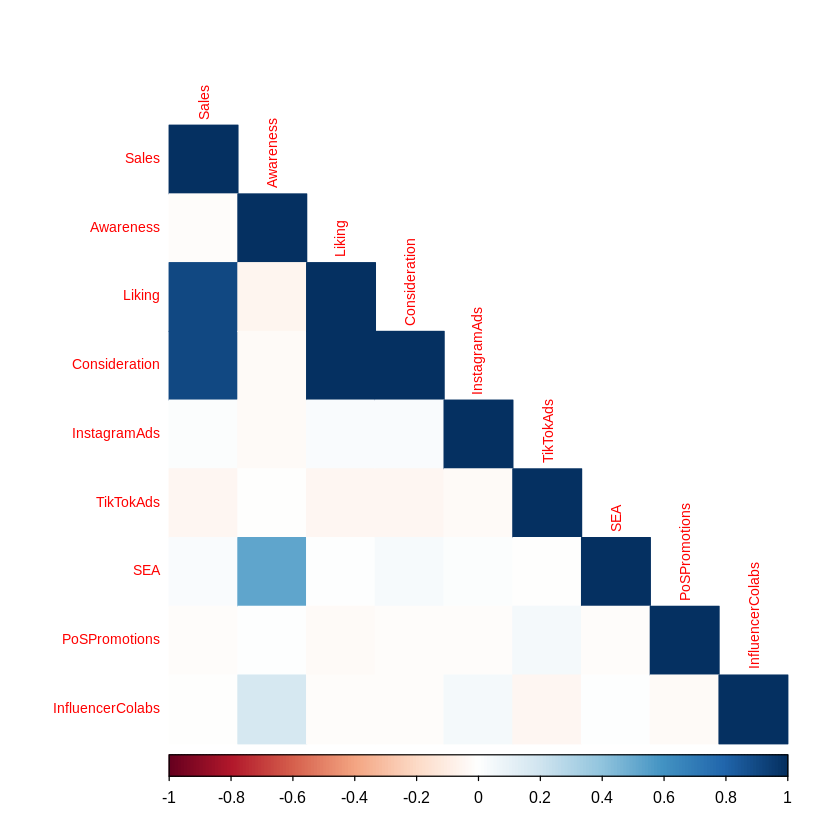

In [ ]:
install.packages("corrplot")
library(corrplot)

# Calculate the correlation matrix
correlation_matrix <- cor(MindSetDF)

# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "lower", tl.cex = 0.7)

Liking and consideration seems to be the most correlated variables to sales

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


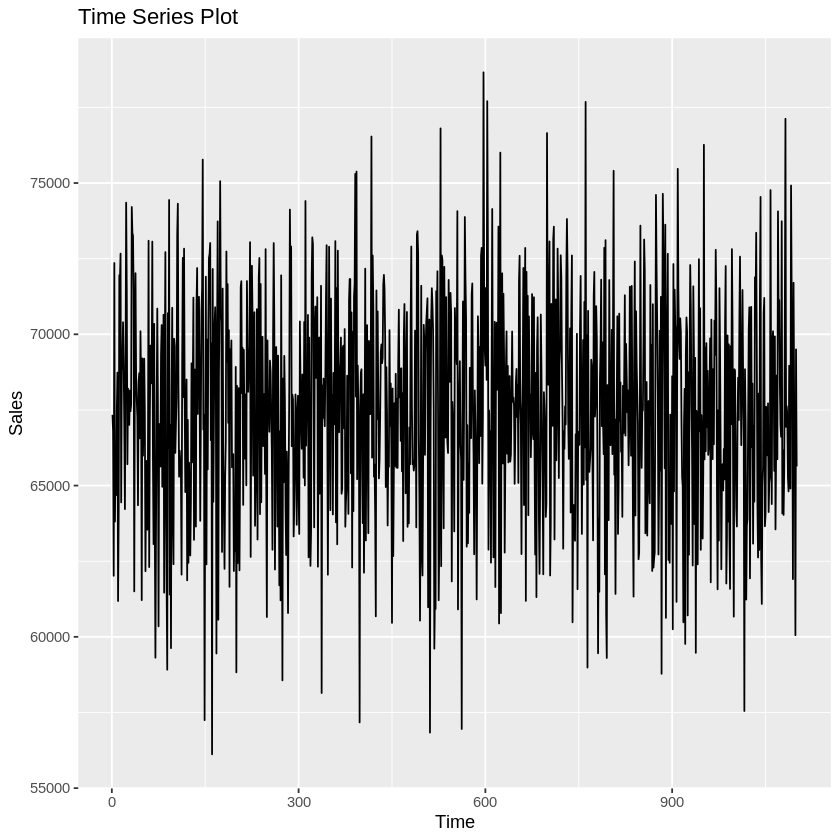

In [ ]:
library(ggplot2)

# Create a sequence for the x-axis
MindSetDF$Time <- seq_len(nrow(MindSetDF))

# Plot the time series
ggplot(MindSetDF, aes(x = Time, y = Sales)) +
  geom_line() +
  labs(title = "Time Series Plot",
       x = "Time",
       y = "Sales")

This looks like a random walk. No identifiable patterns.

# Prediction

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



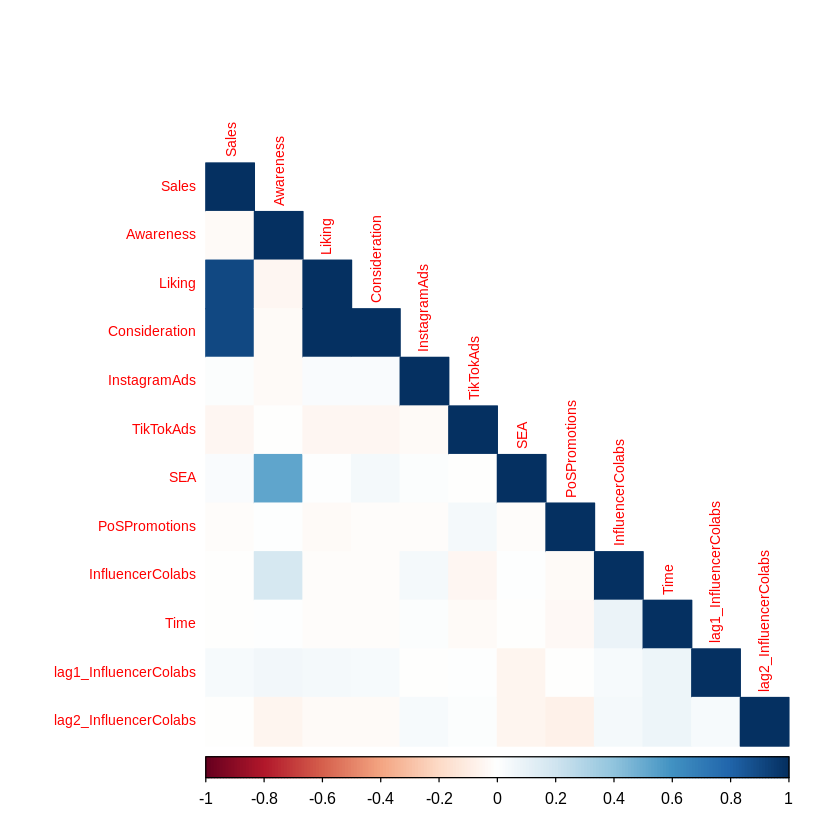

In [ ]:
# Creating lag variables

install.packages("Hmisc")
library(Hmisc)

data_lagged = MindSetDF

data_lagged$lag1_InfluencerColabs <- Lag(data_lagged$InfluencerColabs, +1)
data_lagged$lag2_InfluencerColabs <- Lag(data_lagged$InfluencerColabs, +2)

data_lagged <- na.omit(data_lagged)

# Compute correlations
correlation_matrix <- cor(data_lagged)

# Print the correlation matrix
# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "lower", tl.cex = 0.7)


In [ ]:
data = MindSetDF

# Generate random indices for training and testing sets
index <- sample(1:nrow(data), size = 0.7 * nrow(data))

# Create training and testing sets
train_data <- data[index, ]
test_data <- data[-index, ]

In [ ]:
# Import nnet to for logit model
library(nnet)


# Basic LM model
formula = "Sales ~  Awareness + Liking + Consideration + InstagramAds + TikTokAds + SEA + PoSPromotions + InfluencerColabs"
lm_model = lm(formula, train_data)


out = data.frame(Sales = train_data$Sales )
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
out$predicted_sales = predict(object = lm_model, newdata = train_data)
#out$score  = out$probs * out$amount

In [ ]:
# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

# Calculate R-squared (R2) score using caret's postResample function
scores <- postResample(predictions, test_data$Sales)

# Print the R2 score
cat("RMSE :", scores[1], "\n")
cat("R-squared (R2) Score:", scores[2], "\n")
cat("MAE:", scores[3], "\n")

RMSE : 1466.65 
R-squared (R2) Score: 0.8262426 
MAE: 1159.69 


In [ ]:
predictions <- predict(lm_model, data)
data$predicted_sales <- predictions
head(data)

# Save the data to csv file
write.csv(data, "mindSetPredictions.csv", row.names = FALSE)


,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time,predicted_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733,1,68764.56
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961,2,68735.96
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651,3,62720.80
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805,4,71874.80
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685,5,64888.45
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827,6,66915.19


# Adding Power Features

In [ ]:
# Adding Power Features
# EDA for choosing power variable
ggplot(MindSetDF, aes(x = Awareness, y = Sales)) +
  geom_point()

In [ ]:
# Plot Residuals Against Predicted Values for LM
residuals <- resid(lm_model)
plot(predict(lm_model), residuals, xlab = "Predicted Values", ylab = "Residuals", main = "Residuals vs Predicted")
abline(h = 0, col = "red")

In [ ]:
# Power Features
# library(dplyr)

train_data <- train_data %>%
  mutate(Awareness_sqr = Awareness^2)

formula_power = "Sales ~  Awareness_sqr + Liking + Consideration + InstagramAds + TikTokAds + SEA + PoSPromotions + InfluencerColabs"
lm_model2 <- lm(formula_power, train_data)
summary(lm_model2)

out = data.frame(Sales = train_data$Sales )
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
out$predicted_sales = predict(object = lm_model2, newdata = train_data)
#out$score  = out$probs * out$amount

test_data <- test_data %>%
  mutate(Awareness_sqr = Awareness^2)

# Make predictions on the test set
predictions2 <- predict(lm_model2, newdata = test_data)

# Calculate R-squared (R2) score using caret's postResample function
scores2 <- postResample(predictions2, test_data$Sales)

# Print the R2 score
cat("RMSE :", scores2[1], "\n")
cat("R-squared (R2) Score:", scores2[2], "\n")
cat("MAE:", scores2[3], "\n")


Call:
lm(formula = formula_power, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5133.1  -964.1   -14.2   985.0  4199.0 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.531e+04  3.744e+03  17.445  < 2e-16 ***
Awareness_sqr     4.943e-01  8.064e+00   0.061    0.951    
Liking           -1.191e+02  1.450e+02  -0.821    0.412    
Consideration     6.145e+02  1.467e+02   4.190 3.12e-05 ***
InstagramAds     -1.217e-01  1.368e-01  -0.889    0.374    
TikTokAds        -2.200e-01  1.969e-01  -1.117    0.264    
SEA              -2.497e-02  7.735e-02  -0.323    0.747    
PoSPromotions    -4.381e-01  6.494e-01  -0.675    0.500    
InfluencerColabs -5.242e-02  3.676e-01  -0.143    0.887    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1528 on 761 degrees of freedom
Multiple R-squared:  0.8206,	Adjusted R-squared:  0.8187 
F-statistic: 435.2 on 8 and 761 DF,  p-value: < 2.2e-16

RMSE : 1466.637 
R-squared (R2) Score: 0.8262466 
MAE: 1159.687 


# ARDL Model

In [ ]:
#install.packages("ARDL")
#library(ARDL)

model <- ardl(Sales ~ Awareness + Liking + Consideration + InstagramAds + TikTokAds + SEA + PoSPromotions + InfluencerColabs, data = train_data, order = c(1,1,1,1,1,1,1,1,1))
summary(model)


Time series regression with "ts" data:
Start = 2, End = 770

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
    Min      1Q  Median      3Q     Max 
-5073.1  -953.5   -33.8   994.6  4364.5 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.411e+04  1.142e+04   6.490 1.55e-10 ***
L(Sales, 1)            -6.394e-02  3.647e-02  -1.753    0.080 .  
Awareness               6.005e+00  3.551e+02   0.017    0.987    
L(Awareness, 1)        -2.241e+02  3.571e+02  -0.628    0.530    
Liking                 -1.017e+02  1.471e+02  -0.691    0.490    
L(Liking, 1)           -1.722e+02  1.456e+02  -1.183    0.237    
Consideration           5.977e+02  1.488e+02   4.016 6.52e-05 ***
L(Consideration, 1)     2.114e+02  1.490e+02   1.420    0.156    
InstagramAds           -1.277e-01  1.376e-01  -0.928    0.354    
L(InstagramAds, 1)     -5.739e-03  1.383e-01  -0.041    0.967    
TikTokAds       

# Ordinary Least Squares (OLS) with Lagged Variables

In [ ]:
train_data$Awareness_lag <- stats::lag(train_data$Awareness, -1)
train_data$Liking_lag <- stats::lag(train_data$Liking, -1)
train_data$Consideration_lag <- stats::lag(train_data$Consideration, -1)

model <- lm(Sales ~ Awareness_lag + Liking_lag + Consideration_lag, data = train_data)
summary(model)


Call:
lm(formula = Sales ~ Awareness_lag + Liking_lag + Consideration_lag, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5135.4  -966.1   -20.8  1037.7  4314.2 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       65320.0603  6687.1299   9.768  < 2e-16 ***
Awareness_lag         0.8007   311.2199   0.003    0.998    
Liking_lag          -74.9894   129.3475  -0.580    0.562    
Consideration_lag   570.3084   130.7621   4.361 1.47e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1526 on 766 degrees of freedom
Multiple R-squared:   0.82,	Adjusted R-squared:  0.8193 
F-statistic:  1163 on 3 and 766 DF,  p-value: < 2.2e-16


# Logarithmic+Standardization

In [ ]:
train_data_transformed <- train_data
train_data_transformed$Awareness <- log(train_data$Awareness + 1)
train_data_transformed$Liking <- log(train_data$Liking + 1)
train_data_transformed$Consideration <- log(train_data$Consideration + 1)
train_data_transformed$InstagramAds <- log(train_data$InstagramAds + 1)
train_data_transformed$TikTokAds <- log(train_data$TikTokAds + 1)
train_data_transformed$SEA <- log(train_data$SEA + 1)
train_data_transformed$PoSPromotions <- log(train_data$PoSPromotions + 1)
train_data_transformed$InfluencerColabs <- log(train_data$InfluencerColabs + 1)

# Standardize the log-transformed data
train_data_standardized <- as.data.frame(scale(train_data_transformed))

# Fit Linear Regression Model
formula = "Sales ~ Awareness + Liking + Consideration + InstagramAds + TikTokAds + SEA + PoSPromotions + InfluencerColabs"

# Fit the linear model on the standardized and log-transformed data
lm_model <- lm(formula, data = train_data_standardized)
summary(lm_model)

Warning message in log(train_data$Liking + 1):
“NaNs produced”
Warning message in log(train_data$Consideration + 1):
“NaNs produced”



Call:
lm(formula = formula, data = train_data_standardized)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52124 -0.29245 -0.00053  0.27286  1.23145 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.0891726  0.0554563  -1.608 0.108488    
Awareness        -0.0284771  0.0265933  -1.071 0.284773    
Liking           -0.2540710  0.0652335  -3.895 0.000112 ***
Consideration     1.7650486  0.1460612  12.084  < 2e-16 ***
InstagramAds      0.0001484  0.0199001   0.007 0.994052    
TikTokAds        -0.0200225  0.0192887  -1.038 0.299764    
SEA              -0.0006603  0.0259644  -0.025 0.979721    
PoSPromotions    -0.0182768  0.0196941  -0.928 0.353849    
InfluencerColabs  0.0008149  0.0204749   0.040 0.968269    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.435 on 487 degrees of freedom
  (274 observations deleted due to missingness)
Multiple R-squared:  0.6231,	Adjusted R-squared

In [ ]:
out = data.frame(Sales = train_data$Sales )
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
out$predicted_sales = predict(object = lm_model, newdata = train_data)
#out$score  = out$probs * out$amount

# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

# Calculate R-squared (R2) score using caret's postResample function
scores <- postResample(predictions, test_data$Sales)

# Print the R2 score
cat("RMSE :", scores[1], "\n")
cat("R-squared (R2) Score:", scores[2], "\n")
cat("MAE:", scores[3], "\n")

RMSE : 67308.52 
R-squared (R2) Score: 0.5908034 
MAE: 67218.06 


# Model weights

In [ ]:
# Extract coefficients from the linear model
coefficients <- coef(lm_model)

# Format coefficients using sprintf
formatted_coefficients <- sprintf("%-20s %10.3f", names(coefficients), coefficients)

# Display the formatted coefficients
cat(formatted_coefficients, sep = "\n")

(Intercept)           65171.045
Awareness                16.926
Liking                 -119.403
Consideration           614.898
InstagramAds             -0.122
TikTokAds                -0.220
SEA                      -0.025
PoSPromotions            -0.438
InfluencerColabs         -0.051


# Validate the model

In [ ]:
#install.packages("forecast")
#library(forecast)

# 10-fold cross-validation
timeFolds <- createTimeSlices(1:nrow(MindSetDF), initialWindow = 800, horizon = 10, fixedWindow = TRUE)

# Control object using time series folds
control <- trainControl(method = "timeslice",
                        index = timeFolds$train,
                        indexOut = timeFolds$test)
# Train the model
set.seed(64)
model <- train(Sales ~ ., data = MindSetDF, method = "lm", trControl = control)
print(model)

ERROR: Error: wrong model type for classification


# Mindset Metrics (from class)

In [ ]:
head(MindSetDF)
summary(MindSetDF)
str(MindSetDF)

,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827


     Sales         Awareness         Liking        Consideration     
 Min.   :56117   Min.   :20.84   Min.   :-19.722   Min.   :-16.5002  
 1st Qu.:65277   1st Qu.:21.85   1st Qu.: -3.096   1st Qu.: -0.2323  
 Median :67522   Median :21.97   Median :  1.641   Median :  4.2962  
 Mean   :67506   Mean   :21.96   Mean   :  1.259   Mean   :  4.0564  
 3rd Qu.:70098   3rd Qu.:22.09   3rd Qu.:  5.653   3rd Qu.:  8.3641  
 Max.   :78658   Max.   :22.46   Max.   : 22.831   Max.   : 25.6496  
  InstagramAds      TikTokAds           SEA         PoSPromotions  
 Min.   :   1.0   Min.   :   4.0   Min.   :   0.0   Min.   :  2.0  
 1st Qu.: 318.8   1st Qu.: 223.0   1st Qu.: 678.8   1st Qu.:103.8  
 Median : 638.5   Median : 450.0   Median :1324.5   Median :163.0  
 Mean   : 663.0   Mean   : 465.7   Mean   :1428.2   Mean   :168.7  
 3rd Qu.: 984.8   3rd Qu.: 691.0   3rd Qu.:2024.8   3rd Qu.:227.0  
 Max.   :1499.0   Max.   :1000.0   Max.   :4491.0   Max.   :479.0  
 InfluencerColabs
 Min.   : 379.0 

'data.frame':	1100 obs. of  9 variables:
 $ Sales           : Time-Series  from 1 to 1100: 67339 66783 62019 72356 63810 ...
 $ Awareness       : Time-Series  from 1 to 1100: 21.5 21.9 21.7 22 21.9 ...
 $ Liking          : Time-Series  from 1 to 1100: 5.41 4.75 -8.36 10.49 -4.53 ...
 $ Consideration   : Time-Series  from 1 to 1100: 6.76 6.89 -5.69 12.68 -1.27 ...
 $ InstagramAds    : Time-Series  from 1 to 1100: 301 1429 446 123 643 ...
 $ TikTokAds       : Time-Series  from 1 to 1100: 473 830 903 374 591 775 591 483 568 845 ...
 $ SEA             : Time-Series  from 1 to 1100: 20 233 398 2463 1261 ...
 $ PoSPromotions   : Time-Series  from 1 to 1100: 233 149 53 38 315 286 285 267 138 74 ...
 $ InfluencerColabs: Time-Series  from 1 to 1100: 733 961 651 805 685 827 977 711 727 668 ...


### Potential

In [ ]:
# Potential
potential_awareness <- (100-mean(MindSetDF$Awareness))/100
potential_consideration <- (100-mean(MindSetDF$Consideration))/100
potential_liking <- (100-mean(MindSetDF$Liking))/100

potential_awareness
potential_consideration
potential_liking

[1] 0.7804165

[1] 0.9594357

[1] 0.9874094

### Stickiness

In [ ]:
# Stickiness
ar1 <- ar(MindSetDF$Awareness, aic = TRUE)
ar2 <- ar(MindSetDF$Consideration, aic = TRUE)
ar3 <- ar(MindSetDF$Liking, aic = TRUE)
stick_awareness <- ar1$ar[1] + ar1$ar[2]
stick_consideration <- ar2$ar[1] + ar2$ar[2]+ar2$ar[3]+ar2$ar[4]+ar2$ar[5]+ar2$ar[6]+ar2$ar[7]+ar2$ar[8]
stick_liking <- ar3$ar[1] + ar3$ar[2]+ar3$ar[3]+ar3$ar[4]+ar3$ar[5]+ar3$ar[6]

stick_awareness
stick_consideration
stick_liking

[1] 0.0974357

[1] -0.1587139

[1] -0.1136697

In [ ]:
ar1
ar2
ar3


Call:
ar(x = MindSetDF$Awareness, aic = TRUE)

Coefficients:
     1       2  
0.0515  0.0460  

Order selected 2  sigma^2 estimated as  0.03714


Call:
ar(x = MindSetDF$Consideration, aic = TRUE)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.0334  -0.0270  -0.0428  -0.0402  -0.0995   0.0591   0.0184  -0.0601  

Order selected 8  sigma^2 estimated as  42.18


Call:
ar(x = MindSetDF$Liking, aic = TRUE)

Coefficients:
      1        2        3        4        5        6  
 0.0336  -0.0292  -0.0359  -0.0367  -0.0999   0.0543  

Order selected 6  sigma^2 estimated as  43.27

### Responsiveness

In [ ]:
# lagged variables
MindSetDF$lag_aware <- stats::lag(MindSetDF$Awareness, -1)
MindSetDF$lag_aware[1] <- 0
MindSetDF$lag_consideration <- stats::lag(MindSetDF$Consideration, -1)
MindSetDF$lag_consideration[1] <- 0
MindSetDF$lag_liking <- stats::lag(MindSetDF$Liking, -1)
MindSetDF$lag_liking[1] <- 0
MindSetDF$lag_sales <- stats::lag(MindSetDF$Sales, -1)
MindSetDF$lag_sales[1] <- 0

In [ ]:
# Responsiveness

# log-linear model
response_aware <- lm(log(MindSetDF$Awareness+1)~log(lag_aware+1)
+log(MindSetDF$InstagramAds+1)+log(MindSetDF$TikTokAds+1)+log(MindSetDF$SEA+1)+log(MindSetDF$PoSPromotions+1)+log(MindSetDF$InfluencerColabs+1),
data = MindSetDF)

response_consideration <- lm(log(MindSetDF$Consideration+1)~log(lag_consideration+1)
+log(MindSetDF$InstagramAds+1)+log(MindSetDF$TikTokAds+1)+log(MindSetDF$SEA+1)+log(MindSetDF$PoSPromotions+1)+log(MindSetDF$InfluencerColabs+1),
data = MindSetDF)

response_liking <- lm(log(MindSetDF$Liking+1)~log(lag_liking+1)
+log(MindSetDF$InstagramAds+1)+log(MindSetDF$TikTokAds+1)+log(MindSetDF$SEA+1)+log(MindSetDF$PoSPromotions+1)+log(MindSetDF$InfluencerColabs+1),
data = MindSetDF)

response_sales <- lm(log(MindSetDF$Sales+1)~log(lag_sales+1)
+log(MindSetDF$InstagramAds+1)+log(MindSetDF$TikTokAds+1)+log(MindSetDF$SEA+1)+log(MindSetDF$PoSPromotions+1)+log(MindSetDF$InfluencerColabs+1),
data = MindSetDF)

Warning message in log(MindSetDF$Consideration + 1):
“NaNs produced”
Warning message in log(lag_consideration + 1):
“NaNs produced”
Warning message in log(MindSetDF$Liking + 1):
“NaNs produced”
Warning message in log(lag_liking + 1):
“NaNs produced”


In [ ]:
summary(response_aware)


Call:
lm(formula = log(MindSetDF$Awareness + 1) ~ log(lag_aware + 1) + 
    log(MindSetDF$InstagramAds + 1) + log(MindSetDF$TikTokAds + 
    1) + log(MindSetDF$SEA + 1) + log(MindSetDF$PoSPromotions + 
    1) + log(MindSetDF$InfluencerColabs + 1), data = MindSetDF)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0205730 -0.0042111 -0.0000042  0.0042195  0.0187544 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          3.040e+00  9.086e-03 334.570  < 2e-16 ***
log(lag_aware + 1)                   5.093e-03  2.044e-03   2.492   0.0129 *  
log(MindSetDF$InstagramAds + 1)     -2.209e-04  1.926e-04  -1.147   0.2517    
log(MindSetDF$TikTokAds + 1)         6.845e-05  1.966e-04   0.348   0.7277    
log(MindSetDF$SEA + 1)               5.161e-03  1.896e-04  27.226  < 2e-16 ***
log(MindSetDF$PoSPromotions + 1)     1.447e-05  2.640e-04   0.055   0.9563    
log(MindSetDF$InfluencerColabs + 1)  6.44

In [ ]:
summary(response_consideration)


Call:
lm(formula = log(MindSetDF$Consideration + 1) ~ log(lag_consideration + 
    1) + log(MindSetDF$InstagramAds + 1) + log(MindSetDF$TikTokAds + 
    1) + log(MindSetDF$SEA + 1) + log(MindSetDF$PoSPromotions + 
    1) + log(MindSetDF$InfluencerColabs + 1), data = MindSetDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05967 -0.00670 -0.00036  0.00456  2.00145 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.0815361  0.0845923   0.964    0.335    
log(lag_consideration + 1)           0.9961018  0.0022706 438.690  < 2e-16 ***
log(MindSetDF$InstagramAds + 1)     -0.0010777  0.0023969  -0.450    0.653    
log(MindSetDF$TikTokAds + 1)         0.0006887  0.0024522   0.281    0.779    
log(MindSetDF$SEA + 1)              -0.0092802  0.0023405  -3.965 7.95e-05 ***
log(MindSetDF$PoSPromotions + 1)     0.0026474  0.0033054   0.801    0.423    
log(MindSetDF$InfluencerColabs + 1) -0.0027490  0

In [ ]:
summary(response_liking)


Call:
lm(formula = log(MindSetDF$Liking + 1) ~ log(lag_liking + 1) + 
    log(MindSetDF$InstagramAds + 1) + log(MindSetDF$TikTokAds + 
    1) + log(MindSetDF$SEA + 1) + log(MindSetDF$PoSPromotions + 
    1) + log(MindSetDF$InfluencerColabs + 1), data = MindSetDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05982 -0.00810 -0.00049  0.00473  1.80819 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          0.090181   0.094815   0.951 0.341871    
log(lag_liking + 1)                  0.995193   0.002793 356.344  < 2e-16 ***
log(MindSetDF$InstagramAds + 1)     -0.001149   0.002668  -0.431 0.666845    
log(MindSetDF$TikTokAds + 1)         0.000606   0.002706   0.224 0.822879    
log(MindSetDF$SEA + 1)              -0.009589   0.002530  -3.790 0.000164 ***
log(MindSetDF$PoSPromotions + 1)     0.003139   0.003676   0.854 0.393469    
log(MindSetDF$InfluencerColabs + 1) -0.003882   0.013210  -0.294 0.768

In [ ]:
summary(response_sales)


Call:
lm(formula = log(MindSetDF$Sales + 1) ~ log(lag_sales + 1) + 
    log(MindSetDF$InstagramAds + 1) + log(MindSetDF$TikTokAds + 
    1) + log(MindSetDF$SEA + 1) + log(MindSetDF$PoSPromotions + 
    1) + log(MindSetDF$InfluencerColabs + 1), data = MindSetDF)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.176247 -0.031930  0.002304  0.037513  0.272364 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         10.8571733  0.0759012 143.043  < 2e-16 ***
log(lag_sales + 1)                   0.0242221  0.0047135   5.139 3.27e-07 ***
log(MindSetDF$InstagramAds + 1)      0.0017549  0.0016020   1.095    0.274    
log(MindSetDF$TikTokAds + 1)        -0.0011596  0.0016349  -0.709    0.478    
log(MindSetDF$SEA + 1)               0.0007159  0.0015645   0.458    0.647    
log(MindSetDF$PoSPromotions + 1)    -0.0009417  0.0021961  -0.429    0.668    
log(MindSetDF$InfluencerColabs + 1) -0.0018097  0.00784

### Conversion

In [ ]:
# Conversion
conversion <- lm(log(MindSetDF$Sales+1)~log(lag_sales+1)+log(MindSetDF$Awareness)+log(MindSetDF$Consideration)+log(MindSetDF$Liking), data = MindSetDF)
summary(conversion)

Warning message in log(MindSetDF$Consideration):
“NaNs produced”
Warning message in log(MindSetDF$Liking):
“NaNs produced”



Call:
lm(formula = log(MindSetDF$Sales + 1) ~ log(lag_sales + 1) + 
    log(MindSetDF$Awareness) + log(MindSetDF$Consideration) + 
    log(MindSetDF$Liking), data = MindSetDF)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079723 -0.014760  0.000013  0.013673  0.065499 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  11.238291   0.314387  35.747  < 2e-16 ***
log(lag_sales + 1)            0.004895   0.001998   2.450  0.01455 *  
log(MindSetDF$Awareness)     -0.086892   0.102344  -0.849  0.39619    
log(MindSetDF$Consideration)  0.066723   0.004104  16.257  < 2e-16 ***
log(MindSetDF$Liking)        -0.005860   0.001816  -3.227  0.00132 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02214 on 635 degrees of freedom
  (460 observations deleted due to missingness)
Multiple R-squared:  0.5937,	Adjusted R-squared:  0.5911 
F-statistic:   232 on 4 and 635 DF,